In [1]:
from kaggle_handler import handler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Liner Regression (Supervised Learning)
- Types of Linear Regression
  1) **Simple Linear Regression**

         (1D Input & 1D Output)
  2) **Multiple Linear Regression**
    
         (Many (ND) Input & 1D Output)
  3) **Polynomial Linear Regression**
    
         (Non-Liner Data)
  4) **Regularzation**

# 1) Simple Linear Regression

In [3]:
X = np.arange(100).reshape(100,1)
delta = np.random.uniform(400,.5,size=(100,)).reshape(100,1)
y = (5*X) + delta

## Sklearn Model

In [4]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

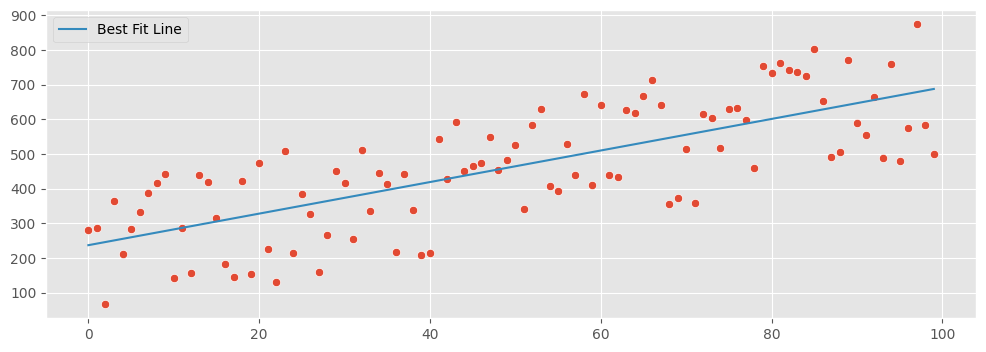

In [5]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=X[:,0],y=y[:,0])
plt.plot(X[:,0],y_pred[:,0], color='C1', label='Best Fit Line')
plt.legend()
plt.show()

In [6]:
lr.coef_

array([[4.55396216]])

In [7]:
lr.intercept_

array([237.11088498])

## My Model Using Direct Formula

In [8]:
class My_LR_Model():
    def __init__(self):
        self.m_ = None
        self.b_ = None
    def fit(self, X, y):
        self.m_ = np.sum((X - X.mean()) * (y - y.mean())) / np.sum((X - X.mean())**2)
        self.b_ = y.mean() - (self.m_*X.mean())
    def predict(self, X):
        return (self.m_*X) + self.b_

In [9]:
My_lr = My_LR_Model()
My_lr.fit(X,y)
My_y_pred = My_lr.predict(X)

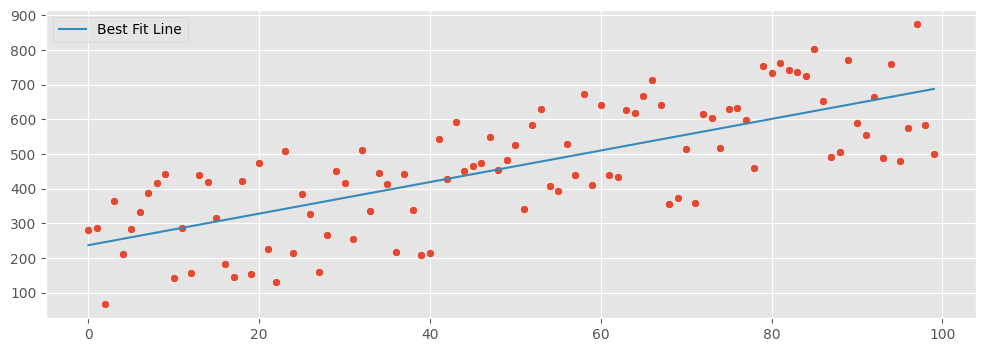

In [10]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=X[:,0],y=y[:,0])
plt.plot(X[:,0],My_y_pred[:,0], color='C1', label='Best Fit Line')
plt.legend()
plt.show()

In [11]:
My_lr.m_

np.float64(4.553962160942178)

In [12]:
My_lr.b_

np.float64(237.11088497751211)

# 2) Multiple Linear Regression

In [13]:
from sklearn.datasets import load_diabetes

In [14]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

## Sklearn Model

In [15]:
lr = LinearRegression()
lr.fit(X,y)

y_pred = lr.predict(X)
r2_score(y_true=y, y_pred=y_pred)

0.5177484222203499

In [16]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [17]:
lr.intercept_

np.float64(152.13348416289597)

## My Model Using Direct Formula

In [18]:
class My_MLR_Model():
    def __init__(self):
        self.m_ = None
        self.b_ = None
    def fit(self, X, y):
        X_ = X.copy()
        X_ = np.insert(X_,0,1,axis=1)
        bita = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
        self.m_ = bita[1:]
        self.b_ = bita[0]
    def predict(self, X):
        return X.dot(self.m_) + self.b_

In [19]:
lr = My_MLR_Model()
lr.fit(X,y)

In [20]:
lr.m_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [21]:
lr.b_

np.float64(152.1334841628959)

In [22]:
y_pred = lr.predict(X)
r2_score(y_true=y, y_pred=y_pred)

0.5177484222203498

# 3) Polynomial Linear Regression